# AirBnb Price Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import copy
import warnings
warnings.filterwarnings('ignore')
import patsy

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
import scipy.stats as stats
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import Lasso

### Store the dataset into the Dataframe


In [2]:
data=pd.read_csv('Airbnb.csv')

### Check the shape of the dataframe


In [3]:
np.shape(data)

(99569, 29)

### Check the Detail information of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99569 entries, 0 to 99568
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      99569 non-null  int64  
 1   property_type           99569 non-null  object 
 2   room_type               99569 non-null  object 
 3   amenities               99569 non-null  object 
 4   accommodates            99569 non-null  int64  
 5   bathrooms               99290 non-null  float64
 6   bed_type                99569 non-null  object 
 7   cancellation_policy     99569 non-null  object 
 8   cleaning_fee            99569 non-null  bool   
 9   city                    99569 non-null  object 
 10  description             99555 non-null  object 
 11  first_review            78269 non-null  object 
 12  host_has_profile_pic    99326 non-null  object 
 13  host_identity_verified  99326 non-null  object 
 14  host_response_rate      74964 non-null

### Display All the column names

In [5]:
data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price'],
      dtype='object')

### Describe the entire dataset

In [6]:
data.describe()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
count,9.956900e+04,99569.000000,99290.000000,99569.000000,99569.000000,99569.000000,77130.000000,99450.000000,99392.000000,74111.000000
mean,1.126789e+07,3.153893,1.236852,38.444231,-92.440619,20.884191,94.053079,1.266094,1.712140,4.782069
std,6.084471e+06,2.144059,0.586095,3.082325,21.707212,38.005896,7.872994,0.849500,1.255247,0.717394
min,1.090000e+02,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.268525e+06,2.000000,1.000000,34.126510,-118.342387,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225639e+07,2.000000,1.000000,40.662118,-76.998190,6.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640530e+07,4.000000,1.000000,40.746019,-73.954589,23.000000,100.000000,1.000000,2.000000,5.220356
max,2.123117e+07,16.000000,15.500000,42.396191,-70.985047,605.000000,100.000000,14.000000,40.000000,7.600402


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
data.head()


,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932


In [8]:
pd.value_counts('property_type')

property_type    13
dtype: int64

In [9]:
Property_type=data['property_type'].unique()
Property_type

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'],
      dtype=object)

In [10]:
data.groupby(['property_type']).count()

,id,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
property_type,,,,,,,,,,,,,,,,,,,,,
Apartment,65675,65675,65675,65675,65502,65675,65675,65675,65675,65664,...,65675,65672,61317,65675,50568,58325,64790,65583,65558,49003
Bed & Breakfast,625,625,625,625,619,625,625,625,625,625,...,625,625,538,625,480,589,618,625,623,462
Boat,87,87,87,87,87,87,87,87,87,87,...,87,87,67,87,65,79,85,87,87,65
Boutique hotel,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,70,92,99,99,99,69
Bungalow,483,483,483,483,483,483,483,483,483,483,...,483,483,407,483,410,424,475,482,483,366
Cabin,91,91,91,91,91,91,91,91,91,91,...,91,91,74,91,76,86,90,91,91,72
Camper/RV,125,125,125,125,124,125,125,125,125,125,...,125,125,76,125,91,115,123,124,125,94
Casa particular,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
Castle,15,15,15,15,15,15,15,15,15,15,...,15,15,14,15,15,13,15,15,15,13


In [11]:
data['property_type'] = data['property_type'].replace(['Train','Vacation home','Bed & Breakfast','Bungalow','Loft','Guesthouse','Villa','Vacation home','Train','Yurt','Treehouse','Tipi','Timeshare','Tent','Serviced apartment','Parking Space','Lighthouse','Island','In-law','Hut','Hostel','Guest suite','Earth House','Chalet','Cave','Castle','Casa particular','Camper/RV','Cabin','Boutique hotel','Boat','Dorm'],'Other')

In [12]:
data.groupby(['property_type']).count()

,id,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
property_type,,,,,,,,,,,,,,,,,,,,,
Apartment,65675,65675,65675,65675,65502,65675,65675,65675,65675,65664,...,65675,65672,61317,65675,50568,58325,64790,65583,65558,49003
Condominium,3609,3609,3609,3609,3608,3609,3609,3609,3609,3609,...,3609,3609,3253,3609,2736,3228,3563,3608,3606,2658
House,22321,22321,22321,22321,22247,22321,22321,22321,22321,22318,...,22321,22320,18649,22321,17646,19740,22063,22307,22277,16511
Other,5730,5730,5730,5730,5700,5730,5730,5730,5730,5730,...,5730,5729,5044,5730,4473,5220,5660,5718,5719,4247
Townhouse,2234,2234,2234,2234,2233,2234,2234,2234,2234,2234,...,2234,2234,1969,2234,1707,1981,2206,2234,2232,1692


In [13]:
data.groupby(['room_type']).count()

,id,property_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,55482,55482,55482,55482,55399,55482,55482,55482,55482,55475,...,55482,55481,50840,55482,44376,47387,54763,55387,55441,41310
Private room,41082,41082,41082,41082,40904,41082,41082,41082,41082,41076,...,41082,41079,36996,41082,30754,38279,40557,41058,40964,30638
Shared room,3005,3005,3005,3005,2987,3005,3005,3005,3005,3004,...,3005,3004,2396,3005,2000,2828,2962,3005,2987,2163


In [14]:
data.groupby(['accommodates']).count()

,id,property_type,room_type,amenities,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
accommodates,,,,,,,,,,,,,,,,,,,,,
1,12694,12694,12694,12694,12599,12694,12694,12694,12694,12689,...,12694,12693,11516,12694,8155,11492,12506,12680,12630,9434
2,42720,42720,42720,42720,42594,42720,42720,42720,42720,42718,...,42720,42717,38882,42720,33539,39127,42175,42645,42626,31854
3,10445,10445,10445,10445,10431,10445,10445,10445,10445,10442,...,10445,10444,9444,10445,8417,9279,10315,10435,10440,7794
4,16228,16228,16228,16228,16197,16228,16228,16228,16228,16225,...,16228,16228,14788,16228,13059,14192,16039,16210,16223,12066
5,4701,4701,4701,4701,4698,4701,4701,4701,4701,4700,...,4701,4701,4240,4701,3741,3898,4643,4701,4700,3444
6,6698,6698,6698,6698,6693,6698,6698,6698,6698,6698,...,6698,6698,6022,6698,5357,5578,6606,6696,6693,4969
7,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,...,1269,1269,1140,1269,1042,1055,1258,1269,1269,946
8,2444,2444,2444,2444,2441,2444,2444,2444,2444,2444,...,2444,2444,2168,2444,1956,1960,2406,2444,2443,1795
9,344,344,344,344,344,344,344,344,344,344,...,344,344,302,344,275,278,337,344,344,270


In [15]:
data.dtypes

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
log_price                 float64
dtype: object

75% and 25% value of bathroom is 4 and 2. So, anything greater than (4+4-2) i.e. 6 will be treated as outlier

In [16]:
data=data.query("accommodates <= 6")

In [17]:
data.groupby(['accommodates']).count()

,id,property_type,room_type,amenities,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
accommodates,,,,,,,,,,,,,,,,,,,,,
1,12694,12694,12694,12694,12599,12694,12694,12694,12694,12689,...,12694,12693,11516,12694,8155,11492,12506,12680,12630,9434
2,42720,42720,42720,42720,42594,42720,42720,42720,42720,42718,...,42720,42717,38882,42720,33539,39127,42175,42645,42626,31854
3,10445,10445,10445,10445,10431,10445,10445,10445,10445,10442,...,10445,10444,9444,10445,8417,9279,10315,10435,10440,7794
4,16228,16228,16228,16228,16197,16228,16228,16228,16228,16225,...,16228,16228,14788,16228,13059,14192,16039,16210,16223,12066
5,4701,4701,4701,4701,4698,4701,4701,4701,4701,4700,...,4701,4701,4240,4701,3741,3898,4643,4701,4700,3444
6,6698,6698,6698,6698,6693,6698,6698,6698,6698,6698,...,6698,6698,6022,6698,5357,5578,6606,6696,6693,4969


In [18]:
data.groupby(['bathrooms']).count()

,id,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
bathrooms,,,,,,,,,,,,,,,,,,,,,
0.0,256,256,256,256,256,256,256,256,256,256,...,256,256,210,256,198,242,254,256,256,189
0.5,281,281,281,281,281,281,281,281,281,281,...,281,281,226,281,195,262,275,281,281,204
1.0,76444,76444,76444,76444,76444,76444,76444,76444,76444,76432,...,76444,76439,69680,76444,59510,69106,75465,76338,76348,57048
1.5,4773,4773,4773,4773,4773,4773,4773,4773,4773,4773,...,4773,4773,4359,4773,3664,4284,4717,4769,4765,3552
2.0,8886,8886,8886,8886,8886,8886,8886,8886,8886,8885,...,8886,8886,7903,8886,6678,7366,8764,8886,8880,6455
2.5,1387,1387,1387,1387,1387,1387,1387,1387,1387,1386,...,1387,1387,1185,1387,982,1105,1372,1387,1386,1059
3.0,742,742,742,742,742,742,742,742,742,742,...,742,742,666,742,534,613,728,742,742,541
3.5,216,216,216,216,216,216,216,216,216,216,...,216,216,192,216,125,172,215,216,216,150
4.0,122,122,122,122,122,122,122,122,122,122,...,122,122,113,122,101,108,121,122,122,93


75% and 25% value of bathroom is 1. So, anything greater than 1 will be treated as outlier

In [19]:
data=data.query("bathrooms <= 1")

In [20]:
data.groupby(['bathrooms']).count()

,id,property_type,room_type,amenities,accommodates,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
bathrooms,,,,,,,,,,,,,,,,,,,,,
0.0,256,256,256,256,256,256,256,256,256,256,...,256,256,210,256,198,242,254,256,256,189
0.5,281,281,281,281,281,281,281,281,281,281,...,281,281,226,281,195,262,275,281,281,204
1.0,76444,76444,76444,76444,76444,76444,76444,76444,76444,76432,...,76444,76439,69680,76444,59510,69106,75465,76338,76348,57048


In [21]:
data.groupby(['bed_type']).count()

,id,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
bed_type,,,,,,,,,,,,,,,,,,,,,
Airbed,551,551,551,551,551,551,551,551,551,551,...,551,551,502,551,395,510,536,551,551,404
Couch,298,298,298,298,298,298,298,298,298,298,...,298,298,265,298,183,276,289,298,298,228
Futon,879,879,879,879,879,879,879,879,879,879,...,879,879,831,879,716,795,866,877,878,666
Pull-out Sofa,703,703,703,703,703,703,703,703,703,702,...,703,703,658,703,582,643,685,702,701,528
Real Bed,74550,74550,74550,74550,74550,74550,74550,74550,74550,74539,...,74550,74545,67860,74550,58027,67386,73618,74447,74457,55615


In [22]:
data.groupby(['bed_type']).count()

,id,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
bed_type,,,,,,,,,,,,,,,,,,,,,
Airbed,551,551,551,551,551,551,551,551,551,551,...,551,551,502,551,395,510,536,551,551,404
Couch,298,298,298,298,298,298,298,298,298,298,...,298,298,265,298,183,276,289,298,298,228
Futon,879,879,879,879,879,879,879,879,879,879,...,879,879,831,879,716,795,866,877,878,666
Pull-out Sofa,703,703,703,703,703,703,703,703,703,702,...,703,703,658,703,582,643,685,702,701,528
Real Bed,74550,74550,74550,74550,74550,74550,74550,74550,74550,74539,...,74550,74545,67860,74550,58027,67386,73618,74447,74457,55615


In [23]:
data.groupby(['cancellation_policy']).count()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
cancellation_policy,,,,,,,,,,,,,,,,,,,,,
flexible,24848,24848,24848,24848,24848,24848,24848,24848,24848,24841,...,24848,24844,22307,24848,14632,22508,24441,24819,24790,18465
long_term,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,1,0
moderate,20531,20531,20531,20531,20531,20531,20531,20531,20531,20530,...,20531,20531,18747,20531,17910,18845,20308,20516,20516,15409
strict,31489,31489,31489,31489,31489,31489,31489,31489,31489,31485,...,31489,31488,28957,31489,27286,28208,31132,31431,31466,23487
super_strict_30,105,105,105,105,105,105,105,105,105,105,...,105,105,98,105,73,45,105,101,105,78
super_strict_60,7,7,7,7,7,7,7,7,7,7,...,7,7,6,7,2,4,7,7,7,2


<AxesSubplot:xlabel='log_price', ylabel='Count'>

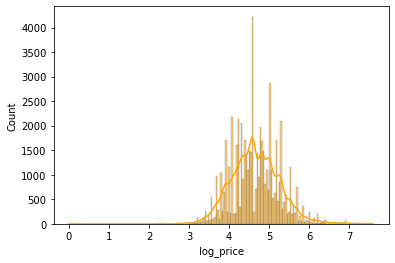

In [24]:
sns.histplot(data['log_price'].dropna(), kde=True, color='orange')

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

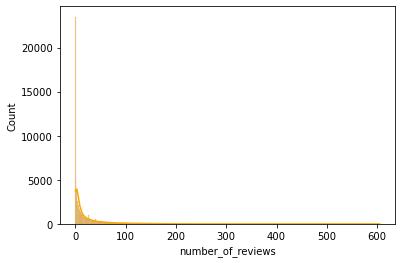

In [25]:
sns.histplot(data['number_of_reviews'].dropna(), kde=True, color='orange')

In [26]:
data.groupby(['cancellation_policy']).count()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
cancellation_policy,,,,,,,,,,,,,,,,,,,,,
flexible,24848,24848,24848,24848,24848,24848,24848,24848,24848,24841,...,24848,24844,22307,24848,14632,22508,24441,24819,24790,18465
long_term,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,1,0
moderate,20531,20531,20531,20531,20531,20531,20531,20531,20531,20530,...,20531,20531,18747,20531,17910,18845,20308,20516,20516,15409
strict,31489,31489,31489,31489,31489,31489,31489,31489,31489,31485,...,31489,31488,28957,31489,27286,28208,31132,31431,31466,23487
super_strict_30,105,105,105,105,105,105,105,105,105,105,...,105,105,98,105,73,45,105,101,105,78
super_strict_60,7,7,7,7,7,7,7,7,7,7,...,7,7,6,7,2,4,7,7,7,2


<AxesSubplot:xlabel='host_has_profile_pic', ylabel='Count'>

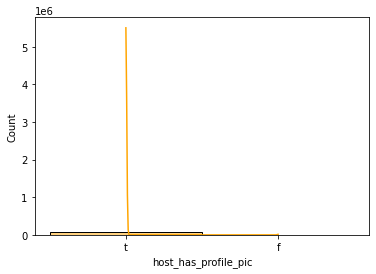

In [27]:
sns.histplot(data['host_has_profile_pic'].dropna(), kde=True, color='orange')

In [28]:
data.groupby(['cleaning_fee']).count()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price
cleaning_fee,,,,,,,,,,,,,,,,,,,,,
False,21532,21532,21532,21532,21532,21532,21532,21532,21532,21524,...,21532,21532,19542,21532,13164,19570,21281,21489,21487,16091
True,55449,55449,55449,55449,55449,55449,55449,55449,55449,55445,...,55449,55444,50574,55449,46739,50040,54713,55386,55398,41350


<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

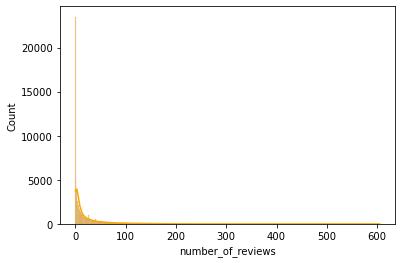

In [29]:
sns.histplot(data['number_of_reviews'].dropna(), kde=True, color='orange')

<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

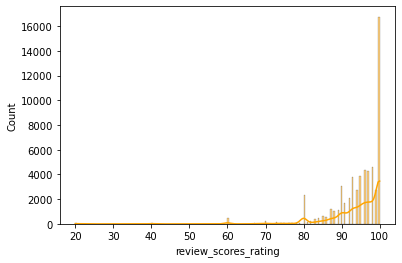

In [30]:
sns.histplot(data['review_scores_rating'].dropna(), kde=True, color='orange')

<AxesSubplot:xlabel='first_review', ylabel='Count'>

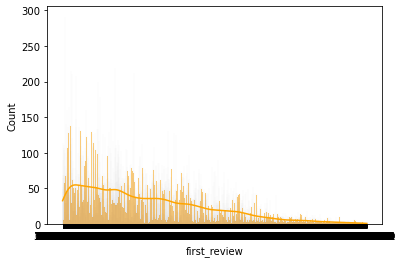

In [31]:
sns.histplot(data['first_review'].dropna(), kde=True, color='orange')

<AxesSubplot:xlabel='last_review', ylabel='Count'>

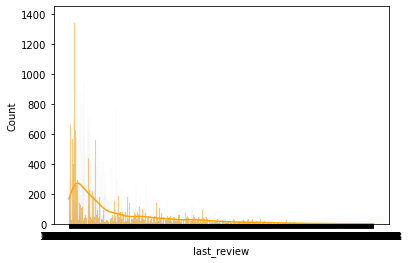

In [32]:
sns.histplot(data['last_review'].dropna(), kde=True, color='orange')

<AxesSubplot:xlabel='host_since', ylabel='Count'>

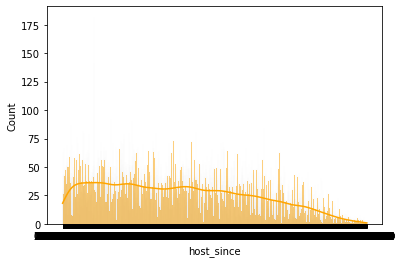

In [33]:
sns.histplot(data['host_since'].dropna(), kde=True, color='orange')

<AxesSubplot:xlabel='host_identity_verified', ylabel='Count'>

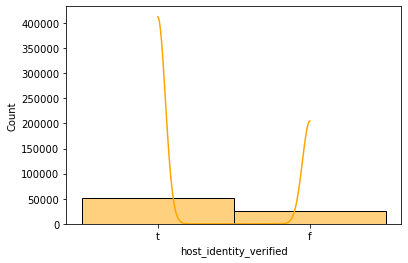

In [34]:
sns.histplot(data['host_identity_verified'].dropna(), kde=True, color='orange')

<AxesSubplot:xlabel='host_response_rate', ylabel='Count'>

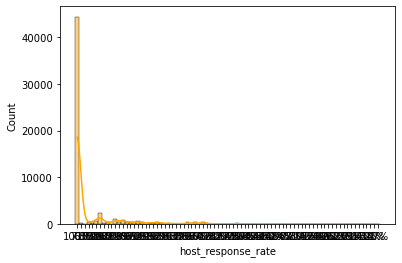

In [35]:
sns.histplot(data['host_response_rate'].dropna(), kde=True, color='orange')

In [36]:
data.dtypes

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
log_price                 float64
dtype: object

In [37]:
data['zipcode'] = data['zipcode'].str.extract('(\d+)').astype(float)
data['host_response_rate'] = data['host_response_rate'].str.extract('(\d+)').astype(float)

data.dtypes

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                   float64
bedrooms                  float64
beds                      float64
log_price                 float64
dtype: object

In [38]:
data = pd.get_dummies(data, columns=['cancellation_policy','room_type','property_type'], drop_first=True)

In [39]:
data=data.drop(['host_has_profile_pic','thumbnail_url','latitude','longitude','name'], axis = 1)

In [40]:
data.isnull().mean()*100

id                                      0.000000
amenities                               0.000000
accommodates                            0.000000
bathrooms                               0.000000
bed_type                                0.000000
cleaning_fee                            0.000000
city                                    0.000000
description                             0.015588
first_review                           21.012977
host_identity_verified                  0.274094
host_response_rate                     25.958353
host_since                              0.274094
instant_bookable                        0.000000
last_review                            20.967511
neighbourhood                           8.917785
number_of_reviews                       0.000000
review_scores_rating                   22.184695
zipcode                                 2.562970
bedrooms                                0.137696
beds                                    0.124706
log_price           

In [41]:
data['review_scores_rating'].fillna(int(data['review_scores_rating'].median()), inplace=True)
data['number_of_reviews'].fillna(int(data['number_of_reviews'].median()), inplace=True)
data['bedrooms'].fillna(int(data['bedrooms'].median()), inplace=True)
data['beds'].fillna(int(data['beds'].median()), inplace=True)
data['accommodates'].fillna(int(data['accommodates'].median()), inplace=True)
data['bathrooms'].fillna(int(data['bathrooms'].median()), inplace=True)
data['host_response_rate'].fillna(float(data['host_response_rate'].median()), inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(data['bed_type'])
data['bed_type'] = business_coder.fit_transform(data['bed_type'])
business_coder.fit(data['cleaning_fee'])
data['cleaning_fee'] = business_coder.fit_transform(data['cleaning_fee'])
business_coder.fit(data['city'])
data['city'] = business_coder.fit_transform(data['city'])
business_coder.fit(data['instant_bookable'])
data['instant_bookable'] = business_coder.fit_transform(data['instant_bookable'])
business_coder.fit(data['host_identity_verified'])
data['host_identity_verified'] = business_coder.fit_transform(data['host_identity_verified'])
business_coder.fit(data['neighbourhood'])
data['neighbourhood'] = business_coder.fit_transform(data['neighbourhood'])


### converting date columns into date time formats

- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [43]:
data['first_review']=pd.to_datetime(data['first_review'])
data['host_since']=pd.to_datetime(data['host_since'])
data['last_review']=pd.to_datetime(data['last_review'])
# data['zipcode']=pd.to_numeric(data['zipcode'].str.replace('$', ''))
# items_df["Cost"] = pd.to_numeric(items_df["Cost"].str.replace('$', ''))

In [44]:
data['day_of_first_review'] = data['first_review'].dt.day
data['month_of_first_review'] = data['first_review'].dt.month
data['year_of_first_review'] = data['first_review'].dt.year
data['day_of_host_since'] = data['host_since'].dt.day
data['month_of_host_since'] = data['host_since'].dt.month
data['year_of_host_since'] = data['host_since'].dt.year
data['day_of_last_review'] = data['last_review'].dt.day
data['month_of_last_review'] = data['last_review'].dt.month
data['year_of_last_review'] = data['last_review'].dt.year



In [45]:
data=data.drop(['first_review','host_since','last_review'], axis = 1)

In [46]:
data.head()

,id,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,host_identity_verified,host_response_rate,...,property_type_Townhouse,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review
0,6901257,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,4,1,4,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,100.0,...,0,18.0,6.0,2016.0,26.0,3.0,2012.0,18.0,7.0,2016.0
2,7919400,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,4,1,4,The Oasis comes complete with a full backyard ...,1,100.0,...,0,30.0,4.0,2017.0,25.0,10.0,2016.0,14.0,9.0,2017.0
3,13418779,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,1,5,This light-filled home-away-from-home is super...,1,100.0,...,0,NaN,NaN,NaN,19.0,4.0,2015.0,NaN,NaN,NaN
4,3808709,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,1,2,"Cool, cozy, and comfortable studio located in ...",1,100.0,...,0,5.0,12.0,2015.0,3.0,1.0,2015.0,22.0,1.0,2017.0
5,12422935,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,4,1,5,Beautiful private room overlooking scenic view...,1,100.0,...,0,27.0,8.0,2017.0,6.0,7.0,2017.0,9.0,5.0,2017.0


In [47]:
data.head()

,id,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,host_identity_verified,host_response_rate,...,property_type_Townhouse,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review
0,6901257,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,4,1,4,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,100.0,...,0,18.0,6.0,2016.0,26.0,3.0,2012.0,18.0,7.0,2016.0
2,7919400,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,4,1,4,The Oasis comes complete with a full backyard ...,1,100.0,...,0,30.0,4.0,2017.0,25.0,10.0,2016.0,14.0,9.0,2017.0
3,13418779,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,1,5,This light-filled home-away-from-home is super...,1,100.0,...,0,NaN,NaN,NaN,19.0,4.0,2015.0,NaN,NaN,NaN
4,3808709,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,1,2,"Cool, cozy, and comfortable studio located in ...",1,100.0,...,0,5.0,12.0,2015.0,3.0,1.0,2015.0,22.0,1.0,2017.0
5,12422935,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,4,1,5,Beautiful private room overlooking scenic view...,1,100.0,...,0,27.0,8.0,2017.0,6.0,7.0,2017.0,9.0,5.0,2017.0


In [48]:
data.head()

,id,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,host_identity_verified,host_response_rate,...,property_type_Townhouse,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review
0,6901257,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,4,1,4,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,100.0,...,0,18.0,6.0,2016.0,26.0,3.0,2012.0,18.0,7.0,2016.0
2,7919400,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,4,1,4,The Oasis comes complete with a full backyard ...,1,100.0,...,0,30.0,4.0,2017.0,25.0,10.0,2016.0,14.0,9.0,2017.0
3,13418779,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,1,5,This light-filled home-away-from-home is super...,1,100.0,...,0,NaN,NaN,NaN,19.0,4.0,2015.0,NaN,NaN,NaN
4,3808709,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,1,2,"Cool, cozy, and comfortable studio located in ...",1,100.0,...,0,5.0,12.0,2015.0,3.0,1.0,2015.0,22.0,1.0,2017.0
5,12422935,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,4,1,5,Beautiful private room overlooking scenic view...,1,100.0,...,0,27.0,8.0,2017.0,6.0,7.0,2017.0,9.0,5.0,2017.0


In [49]:
data.columns

Index(['id', 'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cleaning_fee', 'city', 'description', 'host_identity_verified',
       'host_response_rate', 'instant_bookable', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'log_price', 'cancellation_policy_long_term',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'room_type_Private room',
       'room_type_Shared room', 'property_type_Condominium',
       'property_type_House', 'property_type_Other', 'property_type_Townhouse',
       'day_of_first_review', 'month_of_first_review', 'year_of_first_review',
       'day_of_host_since', 'month_of_host_since', 'year_of_host_since',
       'day_of_last_review', 'month_of_last_review', 'year_of_last_review'],
      dtype='object')

### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected :log_price=0%

In [50]:
data.isnull().mean()*100


id                                      0.000000
amenities                               0.000000
accommodates                            0.000000
bathrooms                               0.000000
bed_type                                0.000000
cleaning_fee                            0.000000
city                                    0.000000
description                             0.015588
host_identity_verified                  0.000000
host_response_rate                      0.000000
instant_bookable                        0.000000
neighbourhood                           0.000000
number_of_reviews                       0.000000
review_scores_rating                    0.000000
zipcode                                 2.562970
bedrooms                                0.000000
beds                                    0.000000
log_price                              25.382887
cancellation_policy_long_term           0.000000
cancellation_policy_moderate            0.000000
cancellation_policy_

In [51]:
corr_matrix=data.corr()

Skewness: 0.301923
Kurtosis: 0.820757


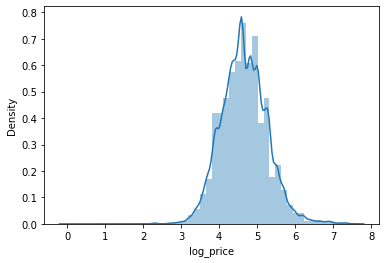

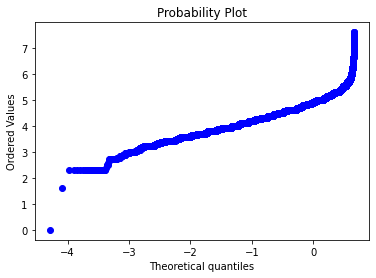

In [52]:
sns.distplot(data['log_price'], kde=True,);
fig = plt.figure()
res = stats.probplot(data['log_price'], plot=plt)
print("Skewness: %f" % data['log_price'].skew())
print("Kurtosis: %f" % data['log_price'].kurt())

In [53]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

[]

In [54]:
data.nunique()

id                                     76981
amenities                              69566
accommodates                               6
bathrooms                                  3
bed_type                                   5
cleaning_fee                               2
city                                       6
description                            76442
host_identity_verified                     3
host_response_rate                        80
instant_bookable                           2
neighbourhood                            605
number_of_reviews                        386
review_scores_rating                      54
zipcode                                  645
bedrooms                                   7
beds                                      10
log_price                                521
cancellation_policy_long_term              2
cancellation_policy_moderate               2
cancellation_policy_strict                 2
cancellation_policy_super_strict_30        2
cancellati

### Show all the Duplicate rows from the dataframe

In [55]:
duplicate=data[data.duplicated()]
duplicate

,id,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,host_identity_verified,host_response_rate,...,property_type_Townhouse,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review


### Check for the number of Rows and Columns in your dataset

In [56]:
data.shape

(76981, 38)

### Find out the total count of null values in each columns

In [57]:
data.isnull().sum()

id                                         0
amenities                                  0
accommodates                               0
bathrooms                                  0
bed_type                                   0
cleaning_fee                               0
city                                       0
description                               12
host_identity_verified                     0
host_response_rate                         0
instant_bookable                           0
neighbourhood                              0
number_of_reviews                          0
review_scores_rating                       0
zipcode                                 1973
bedrooms                                   0
beds                                       0
log_price                              19540
cancellation_policy_long_term              0
cancellation_policy_moderate               0
cancellation_policy_strict                 0
cancellation_policy_super_strict_30        0
cancellati

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [58]:
data.dtypes

id                                       int64
amenities                               object
accommodates                             int64
bathrooms                              float64
bed_type                                 int32
cleaning_fee                             int64
city                                     int32
description                             object
host_identity_verified                   int32
host_response_rate                     float64
instant_bookable                         int32
neighbourhood                            int32
number_of_reviews                        int64
review_scores_rating                   float64
zipcode                                float64
bedrooms                               float64
beds                                   float64
log_price                              float64
cancellation_policy_long_term            uint8
cancellation_policy_moderate             uint8
cancellation_policy_strict               uint8
cancellation_

In [59]:
data['amenities_Count'] = data.amenities.str.count(',')+1

In [60]:
data.head()

,id,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,host_identity_verified,host_response_rate,...,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review,amenities_Count
0,6901257,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,4,1,4,"Beautiful, sunlit brownstone 1-bedroom in the ...",1,100.0,...,18.0,6.0,2016.0,26.0,3.0,2012.0,18.0,7.0,2016.0,9
2,7919400,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,4,1,4,The Oasis comes complete with a full backyard ...,1,100.0,...,30.0,4.0,2017.0,25.0,10.0,2016.0,14.0,9.0,2017.0,19
3,13418779,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,4,1,5,This light-filled home-away-from-home is super...,1,100.0,...,NaN,NaN,NaN,19.0,4.0,2015.0,NaN,NaN,NaN,15
4,3808709,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,4,1,2,"Cool, cozy, and comfortable studio located in ...",1,100.0,...,5.0,12.0,2015.0,3.0,1.0,2015.0,22.0,1.0,2017.0,12
5,12422935,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,4,1,5,Beautiful private room overlooking scenic view...,1,100.0,...,27.0,8.0,2017.0,6.0,7.0,2017.0,9.0,5.0,2017.0,10


In [61]:
data=data.drop(['amenities','id','description'], axis = 1)
data.head()

,accommodates,bathrooms,bed_type,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,...,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review,amenities_Count
0,3,1.0,4,1,4,1,100.0,0,77,2,...,18.0,6.0,2016.0,26.0,3.0,2012.0,18.0,7.0,2016.0,9
2,5,1.0,4,1,4,1,100.0,1,242,10,...,30.0,4.0,2017.0,25.0,10.0,2016.0,14.0,9.0,2017.0,19
3,4,1.0,4,1,5,1,100.0,0,318,0,...,NaN,NaN,NaN,19.0,4.0,2015.0,NaN,NaN,NaN,15
4,2,1.0,4,1,2,1,100.0,1,117,4,...,5.0,12.0,2015.0,3.0,1.0,2015.0,22.0,1.0,2017.0,12
5,2,1.0,4,1,5,1,100.0,1,382,3,...,27.0,8.0,2017.0,6.0,7.0,2017.0,9.0,5.0,2017.0,10


In [62]:
data.dtypes

accommodates                             int64
bathrooms                              float64
bed_type                                 int32
cleaning_fee                             int64
city                                     int32
host_identity_verified                   int32
host_response_rate                     float64
instant_bookable                         int32
neighbourhood                            int32
number_of_reviews                        int64
review_scores_rating                   float64
zipcode                                float64
bedrooms                               float64
beds                                   float64
log_price                              float64
cancellation_policy_long_term            uint8
cancellation_policy_moderate             uint8
cancellation_policy_strict               uint8
cancellation_policy_super_strict_30      uint8
cancellation_policy_super_strict_60      uint8
room_type_Private room                   uint8
room_type_Sha

### Please check the datatype of all the columns after conversion of the above 4 columns

In [63]:
data.head()

,accommodates,bathrooms,bed_type,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,...,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review,amenities_Count
0,3,1.0,4,1,4,1,100.0,0,77,2,...,18.0,6.0,2016.0,26.0,3.0,2012.0,18.0,7.0,2016.0,9
2,5,1.0,4,1,4,1,100.0,1,242,10,...,30.0,4.0,2017.0,25.0,10.0,2016.0,14.0,9.0,2017.0,19
3,4,1.0,4,1,5,1,100.0,0,318,0,...,NaN,NaN,NaN,19.0,4.0,2015.0,NaN,NaN,NaN,15
4,2,1.0,4,1,2,1,100.0,1,117,4,...,5.0,12.0,2015.0,3.0,1.0,2015.0,22.0,1.0,2017.0,12
5,2,1.0,4,1,5,1,100.0,1,382,3,...,27.0,8.0,2017.0,6.0,7.0,2017.0,9.0,5.0,2017.0,10


In [64]:
data[data==np.inf]=np.nan
data.fillna(0, inplace=True)
data.isnull().sum()

accommodates                           0
bathrooms                              0
bed_type                               0
cleaning_fee                           0
city                                   0
host_identity_verified                 0
host_response_rate                     0
instant_bookable                       0
neighbourhood                          0
number_of_reviews                      0
review_scores_rating                   0
zipcode                                0
bedrooms                               0
beds                                   0
log_price                              0
cancellation_policy_long_term          0
cancellation_policy_moderate           0
cancellation_policy_strict             0
cancellation_policy_super_strict_30    0
cancellation_policy_super_strict_60    0
room_type_Private room                 0
room_type_Shared room                  0
property_type_Condominium              0
property_type_House                    0
property_type_Ot

In [65]:
data.shape

(76981, 36)

In [66]:
data.to_csv('data.csv',index=None)

In [67]:
data1=data#[['property_type','room_type','accommodates','bathrooms','review_scores_rating','amenities_Count','bedrooms','zipcode','cancellation_policy','host_response_rate','year_of_host_since','year_of_last_review','log_price']]

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

#### Find out the number of null values from the column that you got from the above code

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [68]:
maindata=data1[data1['log_price']!=0]
nulldata=data1[data1['log_price']==0]

### Check the number of Rows and Columns for both the dataframes 

In [69]:
maindata.shape

(57440, 36)

In [70]:
nulldata.shape

(19541, 36)

### Display the 5 records from maindata and nulldata dataframes

In [71]:
maindata.head()

,accommodates,bathrooms,bed_type,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,...,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review,amenities_Count
0,3,1.0,4,1,4,1,100.0,0,77,2,...,18.0,6.0,2016.0,26.0,3.0,2012.0,18.0,7.0,2016.0,9
2,5,1.0,4,1,4,1,100.0,1,242,10,...,30.0,4.0,2017.0,25.0,10.0,2016.0,14.0,9.0,2017.0,19
3,4,1.0,4,1,5,1,100.0,0,318,0,...,0.0,0.0,0.0,19.0,4.0,2015.0,0.0,0.0,0.0,15
4,2,1.0,4,1,2,1,100.0,1,117,4,...,5.0,12.0,2015.0,3.0,1.0,2015.0,22.0,1.0,2017.0,12
5,2,1.0,4,1,5,1,100.0,1,382,3,...,27.0,8.0,2017.0,6.0,7.0,2017.0,9.0,5.0,2017.0,10


Type Markdown and LaTeX:  𝛼2

In [72]:
nulldata.head()

,accommodates,bathrooms,bed_type,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,...,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review,amenities_Count
11632,1,1.0,4,1,4,0,100.0,1,417,3,...,17.0,8.0,2017.0,20.0,7.0,2017.0,10.0,1.0,2017.0,12
74111,2,1.0,4,1,3,0,100.0,0,468,6,...,23.0,10.0,2016.0,13.0,8.0,2016.0,26.0,2.0,2017.0,21
74112,3,1.0,4,1,4,1,100.0,0,591,2,...,9.0,12.0,2016.0,12.0,4.0,2013.0,16.0,10.0,2016.0,21
74113,1,1.0,4,1,5,1,100.0,0,446,2,...,13.0,11.0,2016.0,8.0,2.0,2011.0,17.0,11.0,2016.0,12
74114,1,1.0,4,1,3,1,100.0,0,328,7,...,11.0,1.0,2015.0,27.0,6.0,2012.0,3.0,1.0,2017.0,20


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [73]:
y=pd.DataFrame(maindata['log_price'])

In [74]:
X=pd.DataFrame(maindata.drop(['log_price'],axis=1))

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [75]:
X_train,X_loc_test,y_train,y_loc_test=train_test_split(X,y,test_size=0.30,random_state=40)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [76]:
X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape

((40208, 35), (17232, 35), (40208, 1), (17232, 1))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [77]:
X_val,X_test,y_val,y_test=train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=10)

### Please check for the number of rows and columns of all the 4 dataframes 

In [78]:
X_val.shape ,X_test.shape ,y_val.shape, y_test.shape

((8616, 35), (8616, 35), (8616, 1), (8616, 1))

# Feature Engineering 

### Display and describe the X_train dataframe 

In [79]:
X_train

,accommodates,bathrooms,bed_type,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,...,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review,amenities_Count
64678,2,1.0,4,1,3,0,100.0,0,468,10,...,23.0,9.0,2016.0,15.0,9.0,2016.0,27.0,11.0,2016.0,22
30240,2,1.0,4,0,3,0,90.0,0,604,70,...,8.0,7.0,2015.0,8.0,1.0,2015.0,4.0,3.0,2017.0,7
15607,2,1.0,4,1,4,1,100.0,0,242,4,...,7.0,6.0,2016.0,22.0,6.0,2011.0,8.0,12.0,2017.0,17
6797,4,1.0,4,1,5,1,100.0,1,446,1,...,24.0,9.0,2017.0,19.0,10.0,2014.0,24.0,9.0,2017.0,31
14529,1,1.0,4,0,3,0,100.0,0,598,0,...,0.0,0.0,0.0,6.0,8.0,2016.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35705,6,1.0,4,1,4,1,67.0,0,23,34,...,22.0,10.0,2013.0,16.0,5.0,2012.0,17.0,6.0,2017.0,12
18749,2,1.0,4,1,4,0,100.0,0,84,0,...,0.0,0.0,0.0,8.0,6.0,2017.0,0.0,0.0,0.0,11
39688,2,1.0,4,1,4,0,100.0,1,246,4,...,30.0,6.0,2017.0,15.0,5.0,2017.0,29.0,8.0,2017.0,17
61124,2,1.0,4,1,5,1,100.0,0,238,3,...,30.0,7.0,2016.0,17.0,8.0,2014.0,25.0,11.0,2016.0,14


In [80]:
X_train.describe()

,accommodates,bathrooms,bed_type,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,...,day_of_first_review,month_of_first_review,year_of_first_review,day_of_host_since,month_of_host_since,year_of_host_since,day_of_last_review,month_of_last_review,year_of_last_review,amenities_Count
count,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,...,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.00000,40208.000000
mean,2.578069,0.994989,3.927701,0.719509,3.341101,0.671657,95.745971,0.259202,333.358113,21.452248,...,12.251890,5.078293,1590.309441,15.639823,6.502711,2008.344533,13.499005,5.097493,1592.06444,16.990798
std,1.241189,0.064204,0.444800,0.449245,1.166311,0.475615,14.462426,0.438202,193.581494,39.227714,...,10.053246,3.927526,822.358992,8.778621,3.368261,107.107339,10.473283,3.801494,822.22019,6.702313
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,2.000000,1.000000,4.000000,0.000000,3.000000,0.000000,100.000000,0.000000,165.000000,1.000000,...,2.000000,1.000000,2013.000000,8.000000,4.000000,2013.000000,3.000000,1.000000,2015.00000,13.000000
50%,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,100.000000,0.000000,317.000000,6.000000,...,11.000000,5.000000,2015.000000,16.000000,7.000000,2014.000000,14.000000,4.000000,2017.00000,17.000000
75%,3.000000,1.000000,4.000000,1.000000,4.000000,1.000000,100.000000,1.000000,543.000000,24.000000,...,21.000000,8.000000,2016.000000,23.000000,9.000000,2015.000000,23.000000,9.000000,2017.00000,21.000000
max,6.000000,1.000000,4.000000,1.000000,5.000000,2.000000,100.000000,1.000000,604.000000,605.000000,...,31.000000,12.000000,2017.000000,31.000000,12.000000,2017.000000,31.000000,12.000000,2017.00000,78.000000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [81]:
X_train.dtypes

accommodates                             int64
bathrooms                              float64
bed_type                                 int32
cleaning_fee                             int64
city                                     int32
host_identity_verified                   int32
host_response_rate                     float64
instant_bookable                         int32
neighbourhood                            int32
number_of_reviews                        int64
review_scores_rating                   float64
zipcode                                float64
bedrooms                               float64
beds                                   float64
cancellation_policy_long_term            uint8
cancellation_policy_moderate             uint8
cancellation_policy_strict               uint8
cancellation_policy_super_strict_30      uint8
cancellation_policy_super_strict_60      uint8
room_type_Private room                   uint8
room_type_Shared room                    uint8
property_type

In [82]:
X_test.dtypes

accommodates                             int64
bathrooms                              float64
bed_type                                 int32
cleaning_fee                             int64
city                                     int32
host_identity_verified                   int32
host_response_rate                     float64
instant_bookable                         int32
neighbourhood                            int32
number_of_reviews                        int64
review_scores_rating                   float64
zipcode                                float64
bedrooms                               float64
beds                                   float64
cancellation_policy_long_term            uint8
cancellation_policy_moderate             uint8
cancellation_policy_strict               uint8
cancellation_policy_super_strict_30      uint8
cancellation_policy_super_strict_60      uint8
room_type_Private room                   uint8
room_type_Shared room                    uint8
property_type

In [83]:
X_val.dtypes

accommodates                             int64
bathrooms                              float64
bed_type                                 int32
cleaning_fee                             int64
city                                     int32
host_identity_verified                   int32
host_response_rate                     float64
instant_bookable                         int32
neighbourhood                            int32
number_of_reviews                        int64
review_scores_rating                   float64
zipcode                                float64
bedrooms                               float64
beds                                   float64
cancellation_policy_long_term            uint8
cancellation_policy_moderate             uint8
cancellation_policy_strict               uint8
cancellation_policy_super_strict_30      uint8
cancellation_policy_super_strict_60      uint8
room_type_Private room                   uint8
room_type_Shared room                    uint8
property_type

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [84]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

34

- Note - Keep the code as it is, no need to change 


In [85]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

1


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [86]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [87]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [88]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_last_review']

In [89]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf


In [90]:
X_train,X_val,X_test=custom(['year_of_last_review'])

In [91]:
train=X_train.copy()
handling_correlation(train.copy(),0.8)

[]

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

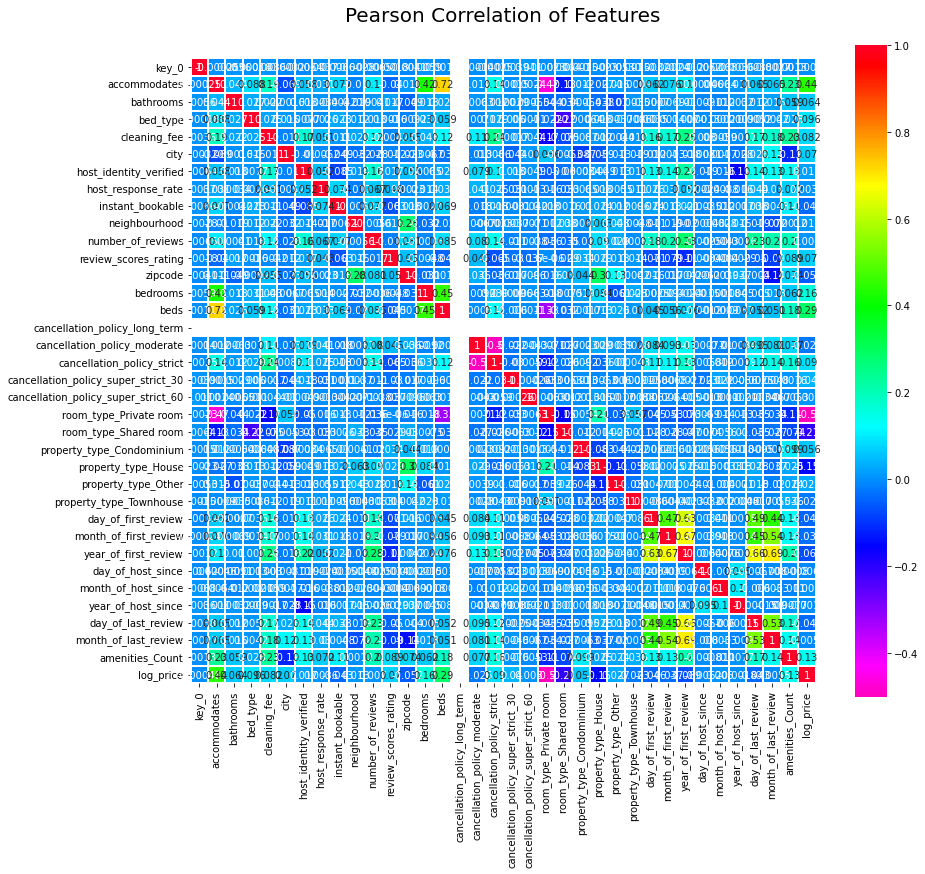

In [92]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [93]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [94]:
sel.variances_

array([1.54051287e+00, 4.12207010e-03, 1.97841889e-01, 2.01815994e-01,
       1.36024662e+00, 2.26204257e-01, 2.09156570e+02, 1.92016395e-01,
       3.74728629e+04, 1.53877528e+03, 4.74693669e+01, 1.47451669e+09,
       2.83317447e-01, 4.74950586e-01, 0.00000000e+00, 1.95484347e-01,
       2.41481621e-01, 1.34121262e-03, 4.97388708e-05, 2.47259188e-01,
       2.79239063e-02, 3.00052188e-02, 1.45432824e-01, 5.33352803e-02,
       1.52302511e-02, 1.01065232e+02, 1.54250779e+01, 6.76257492e+05,
       7.70622741e+01, 1.13448991e+01, 1.14716968e+04, 1.09686927e+02,
       1.44510005e+01, 4.49198815e+01])

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [95]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
X_train[X_train==np.inf]=np.nan
X_train.fillna(X_train.mean(), inplace=True)
X_test[X_test==np.inf]=np.nan
X_test.fillna(X_test.mean(), inplace=True)
X_val[X_val==np.inf]=np.nan
X_val.fillna(X_val.mean(), inplace=True)

In [97]:
y_train[y_train==np.inf]=np.nan
y_train.fillna(y_train.mean(), inplace=True)
y_test[y_test==np.inf]=np.nan
y_test.fillna(y_test.mean(), inplace=True)

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [98]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [99]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [100]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

0.4583922716094921

### Display The Comparison Lists

In [101]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[0.20702756643144213],[0.4183699700046506],

In [102]:

# define model
Algorithm.append('Laso Regression')
# evaluate model
cross_validation = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

## define model

model_lasso = LassoCV(alphas=arange(0, 1, 0.01), cv=cross_validation , n_jobs=-1)
model_lasso.fit(X_train, y_train)
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

MSE_Score.append(mean_squared_error(y_test,pred_test_lasso))
R2_Score.append(r2_score(y_test,pred_test_lasso))

0.45826126960566554
0.4211529807101816
0.4550028202455992
0.41836997000463116


### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [103]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [104]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [105]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

0.5853917994971057

### Display The Comparison Lists

In [106]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Laso Regression', 'Support Vector Regression'],[0.20702756643144213, 0.20702756643144904, 0.34079010363959544],[0.4183699700046506, 0.41836997000463116, 0.04257311420575827],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [107]:
from sklearn.tree import DecisionTreeRegressor 
Algorithm.append('Decision Tree Regression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [108]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [109]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

0.5686405475777504

### Display The Comparison Lists

In [110]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Laso Regression', 'Support Vector Regression', 'Decision Tree Regression'],[0.20702756643144213, 0.20702756643144904, 0.34079010363959544, 0.32184708380958305],[0.4183699700046506, 0.41836997000463116, 0.04257311420575827, 0.09579225493106436],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [111]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [112]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [113]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

0.3969055463975696

### Display The Comparison Lists


In [114]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Laso Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regressor'],[0.20702756643144213, 0.20702756643144904, 0.34079010363959544, 0.32184708380958305, 0.15397679124601382],[0.4183699700046506, 0.41836997000463116, 0.04257311420575827, 0.09579225493106436, 0.567412556430431],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [115]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [116]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test,predicted))

### Check the same for the Validation set also 

In [117]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

0.385921296969027

### Display The Comparison Lists


In [118]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Laso Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regressor', 'XGB Regressor'],[0.20702756643144213, 0.20702756643144904, 0.34079010363959544, 0.32184708380958305, 0.15397679124601382, 0.14255712668247233],[0.4183699700046506, 0.41836997000463116, 0.04257311420575827, 0.09579225493106436, 0.567412556430431, 0.599495336309066],

## You need to make the comparison list into a comparison dataframe 

In [119]:
comparison=pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns=['Algorithm', 'MSE_Score', 'R2_Score'])
comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,0.207028,0.418370
1,Laso Regression,0.207028,0.418370
2,Support Vector Regression,0.340790,0.042573
3,Decision Tree Regression,0.321847,0.095792
4,Random Forest Regressor,0.153977,0.567413
5,XGB Regressor,0.142557,0.599495


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [121]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [122]:
mean_squared_error(y_test,predictedfinal,squared=False)

0.37756738032101284

### Calculate the mean Square Error for validation dataset

In [123]:
mean_squared_error(y_val,predict_testfinal,squared=False)

0.385921296969027

### Calculate the R2 score for test

In [124]:
r2_score(y_test,predictedfinal)

0.599495336309066

### Calculate the R2 score for Validation

In [125]:
r2_score(y_val,predict_testfinal)

0.585301208962354

### Calculate the Accuracy for train Dataset 

In [126]:
regressorfinal.score(X_train,y_train)

0.7305363643692547

### Calculate the accuracy for validation

In [127]:
regressorfinal.score(X_val,y_val)

0.585301208962354

### Calculate the accuracy for test

In [128]:
regressorfinal.score(X_test,y_test)

0.599495336309066

# END OF THE PROJECT